In [1]:
#import the pachages
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# 3D

In [2]:
#function that get the pareto points
def simple_cull(Points, dominates):
    paretoPoints = set()
    candidateRowNr = 0
    dominatedPoints = set()
    while True:
        candidateRow = Points[candidateRowNr]
        Points.remove(candidateRow)
        rowNr = 0
        nonDominated = True
        while len(Points) != 0 and rowNr < len(Points):
            row = Points[rowNr]
            if dominates(candidateRow, row):
                Points.remove(row)
                dominatedPoints.add(tuple(row))
            elif dominates(row, candidateRow):
                nonDominated = False
                dominatedPoints.add(tuple(candidateRow))
                rowNr += 1
            else:
                rowNr += 1
        if nonDominated:
            paretoPoints.add(tuple(candidateRow))
        if len(Points) == 0:
            break
    return paretoPoints, dominatedPoints

In [3]:
def dominates(row, candidateRow):
    return sum([row[x] >= candidateRow[x] for x in range(len(row))]) == len(row)

In [4]:
#put your set of points here 
#exepmles of points
Points =  [[97, 23,25],
                  [55, 77,35],
                  [34, 76,29],
                  [80, 60,42],
                  [99,  4,28],
                  [81,  5,76],
                  [ 5, 81,56],
                  [30, 79,24],
                  [15, 80,42],
                  [70, 65,74],
                  [90, 40,36],
                  [40, 30,94],
                  [30, 40,5],
                  [20, 60,42],
                  [60, 50,4],
                  [20, 20,49],
                  [30,  1,73],
                  [60, 40,55],
                  [70, 25,42],
                  [44, 62,37],
                  [55, 55,49],
                  [55, 10,18],
                  [15, 45,72],
                  [83, 22,29],
                  [76, 46,10],
                  [56, 32,27],
                  [45, 55,88],
                  [10, 70,26],
                  [10, 30,44],
                  [79, 50,40]]

In [5]:
paretoPoints, dominatedPoints = simple_cull(Points, dominates)
#the points of pareto


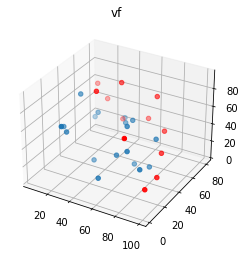

In [6]:
#plot the pareto front 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
dp = np.array(list(dominatedPoints))
pp = np.array(list(paretoPoints))
plt.title('vf')
ax.scatter(dp[:,0],dp[:,1],dp[:,2])
ax.scatter(pp[:,0],pp[:,1],pp[:,2],color='red')

# 2D 

In [7]:
#function that calculates the pareto
def pareto(points):
    n = points.shape[0]
    population_ids = np.arange(n)
    pareto_front = np.ones(n, dtype=bool)
    #idea of geting the pareto_front 
    for i in range(n):
        for j in range(n):
            if all(points[j] <= points[i]) and any(points[j] < points[i]):
                pareto_front[i] = 0
                break
    return population_ids[pareto_front]

In [8]:
#put your set of points here 
#exepmles of points
points = np.array([[97, 23],
                  [55, 77],
                  [ 5, 81],
                  [30, 79],
                  [15, 80],
                  [70, 65],
                  [90, 40],
                  [40, 30],
                  [30, 40],
                  [20, 60],
                  [60, 50],
                  [20, 20],
                  [30,  1],
                  [60, 40],
                  [70, 25],
                  [44, 62],
                  [55, 55],
                  [55, 10],
                  [10, 30],
                  [79, 50]])

In [9]:
pareto = pareto(points)
pareto_front = points[pareto]

In [10]:
#create a data frame that contains a pareto front
data = pd.DataFrame(pareto_front)
data.sort_values(0, inplace=True)
pareto_front = data.values

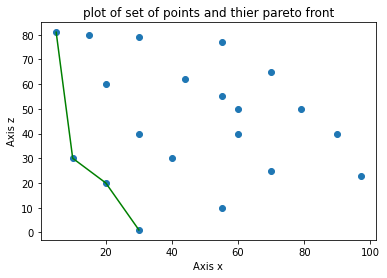

In [11]:
#plot the pareto front 
x = points[:, 0]
y = points[:, 1]
x_pareto = pareto_front[:, 0]
y_pareto = pareto_front[:, 1]

plt.scatter(x, y)
plt.title("plot of set of points and thier pareto front")
plt.plot(x_pareto, y_pareto, color='g')
plt.xlabel('Axis x')
plt.ylabel('Axis z')
plt.show()